<a href="https://colab.research.google.com/github/AmmarMahmoudIbrahiem/House-Price-Prediction--Exploratoy-Data-Analysis-and-ML-/blob/main/Brest_cancer_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Activation
import tensorflow as tf

In [3]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
print(breast_cancer_dataset )

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
data_fram=pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
print(data_fram)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [5]:
data_fram.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data_fram['lable']=breast_cancer_dataset.target
data_fram.tail(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,lable
549,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.00816,0.1976,0.06328,...,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626,1
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.00000,0.1661,0.05948,...,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592,1
551,11.130,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.02257,0.2030,0.06552,...,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032,1
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.01499,0.1539,0.05637,...,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484,1
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,1
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242,1
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,1
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,1
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,...,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969,1
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1


In [7]:
data_fram['lable'].value_counts()

1    357
0    212
Name: lable, dtype: int64

In [8]:
data_fram.shape

(569, 31)

In [9]:
data_fram.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
lable                      0
dtype: int64

In [10]:
data_fram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
data_fram.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,lable
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
X=data_fram.drop(columns='lable', axis=1)
Y=data_fram['lable']

In [13]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [14]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: lable, Length: 569, dtype: int64


In [16]:
X_train ,X_test ,Y_train , Y_test = train_test_split(X ,Y ,test_size=0.2, random_state=2)

In [17]:
print('the features train data', X_train.shape)
print('the lables train data ',  X_test.shape)
print('the features test data ', Y_train.shape)
print('the lables test data ',   Y_test.shape)

the features train data (455, 30)
the lables train data  (114, 30)
the features test data  (455,)
the lables test data  (114,)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_std= scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

In [19]:
model =Sequential()
model.add(Dense(10,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 22        
                                                                 
 activation_2 (Activation)   (None, 2)                 0         
                                                                 
Total params: 442
Trainable params: 442
Non-trainable pa

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(X_train , Y_train ,validation_split=0.1 , epochs=50)

Epoch 1/50
13/13 [==============================] - 1s 19ms/step - loss: 41.1175 - accuracy: 0.3570 - val_loss: 26.6509 - val_accuracy: 0.2609
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 22.0489 - accuracy: 0.1614 - val_loss: 15.4071 - val_accuracy: 0.0217
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 11.6017 - accuracy: 0.1222 - val_loss: 7.4246 - val_accuracy: 0.0870
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 7.2311 - accuracy: 0.1320 - val_loss: 6.0567 - val_accuracy: 0.1522
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 5.8557 - accuracy: 0.1369 - val_loss: 4.5745 - val_accuracy: 0.1522
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 4.0215 - accuracy: 0.1980 - val_loss: 3.0918 - val_accuracy: 0.0870
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 2.7683 - accuracy: 0.2127 - val_loss: 1.8421 - val_accuracy: 0.1304
Epoch 8/50
13/

In [21]:
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras

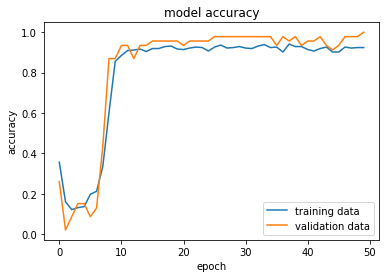

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

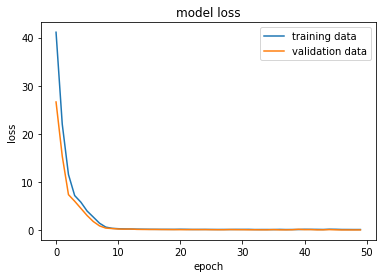

In [23]:
#tf.keras.callbacks.History()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
y_pred=pd.DataFrame(X_test)
print(y_pred)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
528       13.940         13.17           90.31      594.2          0.12480   
291       14.960         19.10           97.03      687.3          0.08992   
467        9.668         18.10           61.06      286.3          0.08311   
108       22.270         19.67          152.80     1509.0          0.13260   
340       14.420         16.54           94.15      641.2          0.09751   
..           ...           ...             ...        ...              ...   
471       12.040         28.14           76.85      449.9          0.08752   
449       21.100         20.52          138.10     1384.0          0.09684   
24        16.650         21.38          110.00      904.6          0.11210   
38        14.990         25.20           95.54      698.8          0.09387   
230       17.050         19.08          113.40      895.0          0.11410   

     mean compactness  mean concavity  mean concave points  mea

In [24]:
accuracy=model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.2402 - accuracy: 0.8947


In [26]:
y_pred=model.predict(X_train)
print(y_pred)

[[4.25171017e-33 3.35685687e-32]
 [2.95420432e-22 2.19594158e-20]
 [0.00000000e+00 0.00000000e+00]
 [9.83061811e-33 3.53439781e-37]
 [1.74646648e-22 5.91782852e-22]
 [6.11811094e-21 1.88946418e-19]
 [3.31151978e-29 1.13840070e-28]
 [0.00000000e+00 0.00000000e+00]
 [3.07979778e-35 7.26979258e-35]
 [2.70589654e-31 1.74707895e-30]
 [0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00]
 [1.23420663e-26 1.07680278e-25]
 [0.00000000e+00 0.00000000e+00]
 [8.17979040e-28 5.35548463e-27]
 [1.68792303e-22 6.16607207e-21]
 [7.16931007e-32 1.30380112e-33]
 [0.00000000e+00 0.00000000e+00]
 [1.52649799e-25 4.83391244e-24]
 [0.00000000e+00 0.00000000e+00]
 [3.31652702e-36 3.52820138e-37]
 [5.85630808e-33 2.44952936e-32]
 [1.23211770e-19 5.12537320e-18]
 [1.45948898e-22 3.54880153e-21]
 [1.33497151e-30 4.68612369e-29]
 [2.52435201e-28 2.92157294e-27]
 [9.32263247e-22 8.89956254e-20]
 [5.01692982e-18 6.56934865e-17]
 [1.35041919e-30 3.76622296e-30]
 [0.00000000e+00 0.00000000e+00]
 [5.344681

In [27]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
   print('The tumor is Benign')

[[0.523885   0.43909433]]
[0]
The tumor is Malignant


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
